<a href="https://colab.research.google.com/github/Kamaljit12/pytorch-tutorial/blob/main/01_pytorch_workflow_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Workflow


In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

for k, v in what_were_covering.items():
  print(f"{k}: {v}")

1: data (prepare and load)
2: build model
3: fitting the model to data (training)
4: making predictions and evaluting a model (inference)
5: saving and loading a model
6: putting it all together


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
print(torch.__version__)

2.9.0+cu126


### 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

- Excel speadsheet
- Images of any kind
- Videos (YouTube has lots of data...)
- Audio like songs or podcasts
- DNA
- Text

Machine learning is a game of two parts:

- Get data into a numerical representation.
- Build a model to learn patterns in that numerical representation.

To showcase this, let's create some known data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters.**

In [ ]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step)
y = weight * X + bias

In [ ]:
X[:10], y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[: train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40]), torch.Size([40]), torch.Size([10]), torch.Size([10]))

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# visualize

def plot_predictions(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None):

  """
  Plots training data, test data and compares prediction.
  """

  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_label, c="b", s=4,
              label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

  # Are there predictions
  if predictions is not None:
    # Plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

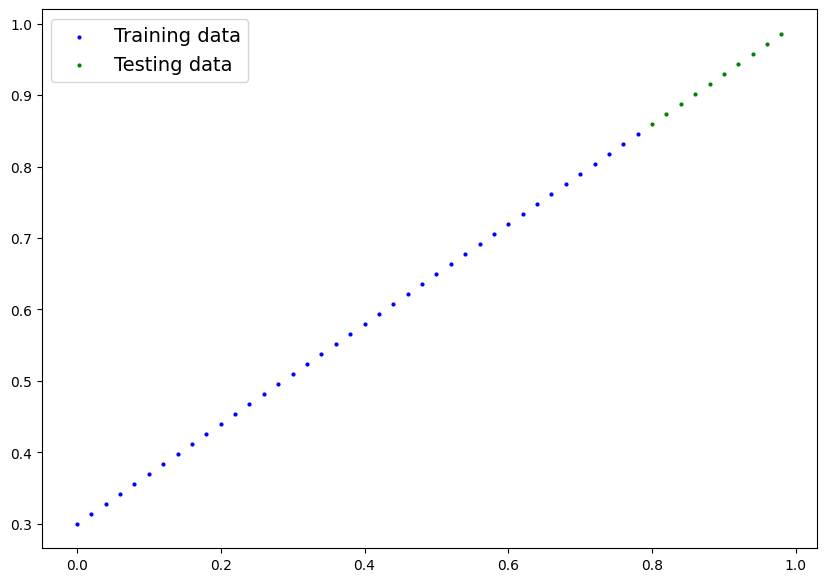

In [ ]:
plot_predictions()

### Build model

In [ ]:
from torch import nn
import torch

In [ ]:
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.weights * X + self.bias

### PyTorch model building essentials

- torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
- torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
- torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
- def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instances of model
model_0 = LinearRegressionModelV1()

In [ ]:
# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

In [ ]:
y_test

tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
        0.9860])

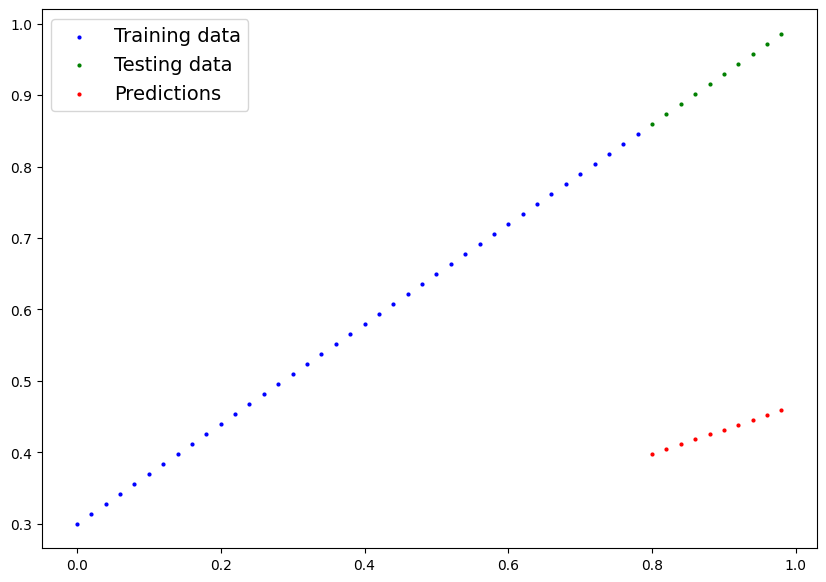

In [ ]:
plot_predictions(test_data=X_test, predictions=y_preds)

### Train model

In [ ]:
# check the list of models parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# check out the models parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss()

# Set an optimization (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### Building a training loop (and a testing loop) in PyTorch

In [ ]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []


### Training

# Loop through the data
for epoch in range(epochs):

  # Set the model to training mode
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()

  with torch.inference_mode():

    # Do the forward pass
    test_pred = model_0(X_test)

    # Calculate the test loss
    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happenin'
    if epochs % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

      # print out model state_dict
      print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 1 | Loss: 0.3013603389263153 | Test loss: 0.4675942063331604
OrderedDict({'weights': tensor([0.3445]), 'bias': tensor([0.1488])})
Epoch: 2 | Loss: 0.28983935713768005 | Test loss: 0.4541231691837311
OrderedDict({'weights': tensor([0.3484]), 'bias': tensor([0.1588])})
Epoch: 3 | Loss: 0.2783183455467224 | Test loss: 0.44065219163894653
OrderedDict({'weights': tensor([0.3523]), 'bias': tensor([0.1688])})
Epoch: 4 | Loss: 0.26679736375808716 | Test loss: 0.4271811842918396
OrderedDict({'weights': tensor([0.3562]), 'bias': tensor([0.1788])})
Epoch: 5 | Loss: 0.2552763521671295 | Test loss: 0.41371020674705505
OrderedDict({'weights': tensor([0.3601]), 'bias': tensor([0.1888])})
Epoch: 6 | Loss: 0.24375534057617188 | Test loss: 0.40023916959762573
OrderedDict({'weights': tensor([0.3640]), 'bias': tensor([0.1988])})
Epoch: 7 | Loss: 0.23223432898521

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
epoch_count = []
loss_values = []
test_loss_values = []


In [ ]:
import numpy as np

np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.30136034, 0.28983936, 0.27831835, 0.26679736,
       0.25527635, 0.24375534, 0.23223433, 0.22071333, 0.20919232,
       0.19767132, 0.18615034, 0.17462933, 0.16310832, 0.15158734,
       0.14006636, 0.12854536, 0.11702438, 0.10609122, 0.09681284,
       0.08908726, 0.08227583, 0.07638873, 0.07160007, 0.06747635,
       0.06395438, 0.06097005, 0.05845819, 0.05635259, 0.05458578,
       0.05314853, 0.05181945, 0.05069301, 0.04982285, 0.04895269,
       0.04819351, 0.04753182, 0.04692793, 0.04642332, 0.04591871,
       0.04543797, 0.04503796, 0.04463796, 0.04423796, 0.04383796,
       0.04343796, 0.04307463, 0.04272563, 0.04237663, 0.04202763,
       0.04167863, 0.04132963, 0.04098063, 0.04063163, 0.04028264,
       0.03993364, 0.03958464, 0.03923564, 0.03888664, 0.03853764,
       0.03818933, 0.03785244, 0.03750344, 0.03716412, 0.03681822,
       0.03647511, 0.03613304, 0.0357861 , 0.03544784, 0.03509884,
       0.0347609 , 0.03441364, 0.03407188, 0.03372844, 0.03338

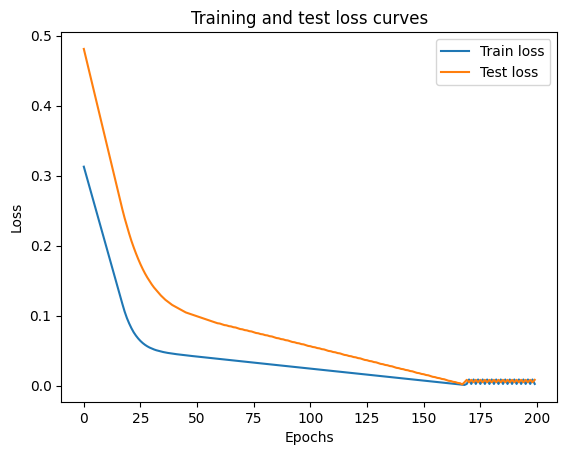

In [ ]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()


In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
len(y_preds), len(y_test)

(10, 10)

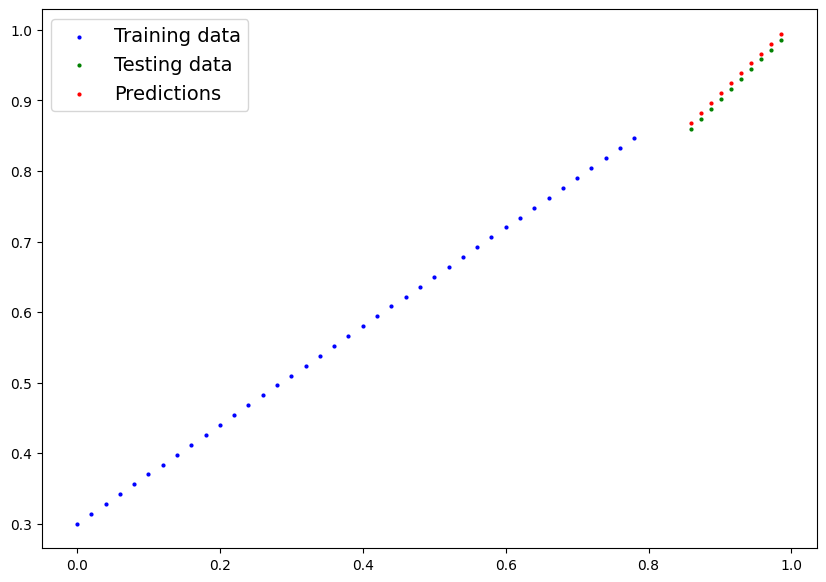

In [ ]:
plot_predictions(test_data=y_test, predictions=y_preds)

### Saving a model in PyTorch

In [ ]:
# Saving our PyTorch model
from pathlib import Path
import os

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_LinderRegression_Model.pth"
MODEL_SAVE_PATH = os.path.join(MODEL_PATH, MODEL_NAME)
MODEL_SAVE_PATH

'models/01_LinderRegression_Model.pth'

In [ ]:
# Saving the model stade dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_LinderRegression_Model.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 2101 Dec  6 12:46 01_LinderRegression_Model.pth


### Loading a PyTorch model

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModelV1()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# # Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([0.8685, 0.8825, 0.8965, 0.9105, 0.9245, 0.9384, 0.9524, 0.9664, 0.9804,
        0.9944])

In [ ]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([0.8685, 0.8825, 0.8965, 0.9105, 0.9245, 0.9384, 0.9524, 0.9664, 0.9804,
        0.9944])

In [ ]:
# # Compare loaded model preds with original model preds
y_preds== loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True])

### Putting it all together

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch version
print(torch.__version__)

2.9.0+cu126


In [60]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Data

In [103]:
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [134]:
# # Split data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [136]:
from prompt_toolkit.shortcuts.progress_bar import Label
def plot_predictions(train_date=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  # plot trainin data
  plt.scatter(train_date, train_label, c="b", s=4, label="Training data")

  # plot test data
  plt.scatter(test_data, y_test, c="g", s=4, label="Training data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})
  plt.show()

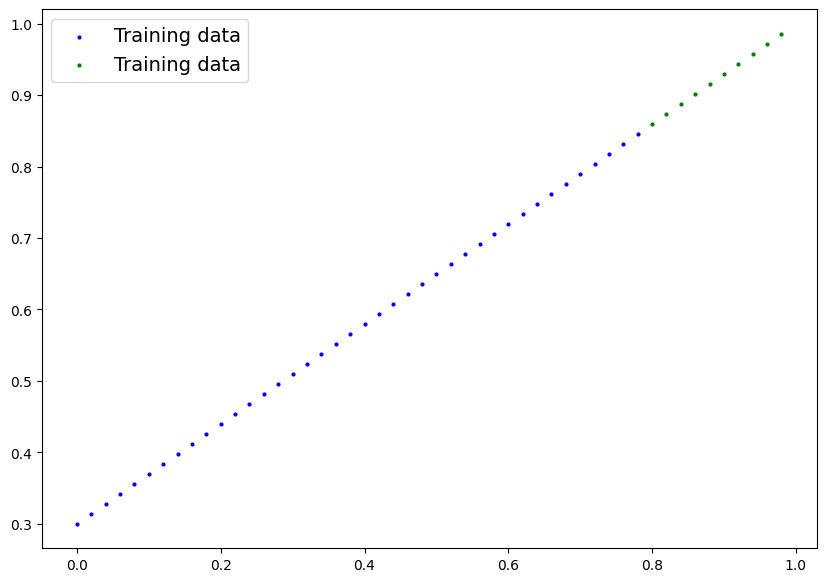

In [137]:
plot_predictions(X_train, y_train, X_test, y_test)

### Building a PyTorch Linear model

In [112]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.liner_layer = nn.Linear(in_features=1,
                                 out_features=1)

  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.liner_layer(X)


# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (liner_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('liner_layer.weight', tensor([[0.7645]])),
              ('liner_layer.bias', tensor([0.8300]))]))

In [113]:
model_1.state_dict()

OrderedDict([('liner_layer.weight', tensor([[0.7645]])),
             ('liner_layer.bias', tensor([0.8300]))])

In [114]:
# Check the model current device
list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [115]:
next(model_1.parameters()).device

device(type='cpu')

In [118]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [119]:
model_1.state_dict()

OrderedDict([('liner_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('liner_layer.bias', tensor([0.8300], device='cuda:0'))])

In [126]:
next(model_1.parameters())

Parameter containing:
tensor([[0.7645]], device='cuda:0', requires_grad=True)

### Training

For training we need:

- Loss function
- Optimizer
- Training loop
- Testing loop

In [127]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [128]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # Forward pass
  y_pred = model_1(X_train)

  # Calculate loss function
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Perform backpropogration
  loss.backward()

  # optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [129]:
model_1.state_dict()

OrderedDict([('liner_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('liner_layer.bias', tensor([0.3025], device='cuda:0'))])

In [79]:
weight, bias

(0.7, 0.3)

### Making and evaluating predictions

In [130]:
# Trun model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_pred = model_1(X_test)

y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [131]:
y_pred, X_test

(tensor([[0.8600],
         [0.8739],
         [0.8878],
         [0.9018],
         [0.9157],
         [0.9296],
         [0.9436],
         [0.9575],
         [0.9714],
         [0.9854]], device='cuda:0'),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]], device='cuda:0'))

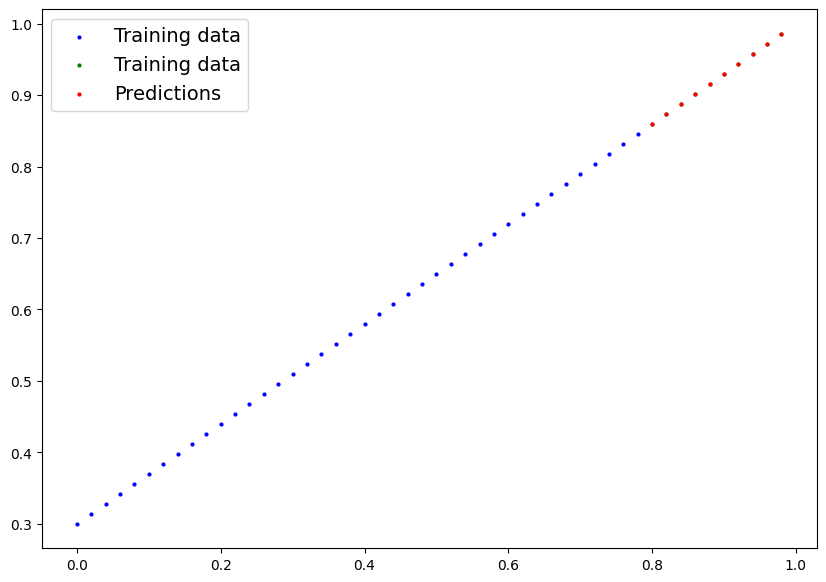

In [138]:
plot_predictions(predictions=y_pred.cpu())

### Saving & loading a trained model

In [141]:
from pathlib import Path
import os

# 1. Create models directory
MODEL_PATH = Path("model_1")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "lr_model_v1.pht"
MODEL_SAVE_PATH = os.path.join(MODEL_PATH, MODEL_NAME)

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: model_1/lr_model_v1.pht


In [142]:
model_1.state_dict()

OrderedDict([('liner_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('liner_layer.bias', tensor([0.3025], device='cuda:0'))])

In [143]:
# load the pytorch saved model

# Create a new instance of the linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (liner_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [144]:
loaded_model_1.state_dict()

OrderedDict([('liner_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('liner_layer.bias', tensor([0.3025], device='cuda:0'))])

In [145]:
next(loaded_model_1.parameters())

Parameter containing:
tensor([[0.6968]], device='cuda:0', requires_grad=True)

In [148]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_pred = loaded_model_1(X_test.to(device))

loaded_model_1_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [149]:
y_pred == loaded_model_1_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')